# Grayscale

### Average Method

### Import Library

In [5]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

##### testing image

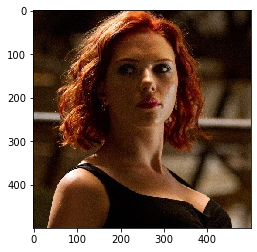

In [6]:
#Load image using matplotlib
picture = image.imread('blackwidow.jpg')
plt.imshow(picture)
plt.show()

##### convert image into numpy array

In [7]:
picture_1 = Image.open('blackwidow.jpg')
data = asarray(picture_1)

In [8]:
#get the dimension of the image
print(data.shape)
print(type(data))

(500, 500, 3)
<class 'numpy.ndarray'>


this image is 500 x 500 pixels with 3 channels (RGB)

In [9]:
print(data)

[[[ 23   5   1]
  [ 24   6   2]
  [ 21   3   0]
  ...
  [ 22   8   5]
  [ 20   6   3]
  [ 15   1   0]]

 [[ 26   8   4]
  [ 20   2   0]
  [ 27   9   5]
  ...
  [ 24  10   7]
  [ 21   7   4]
  [ 24  10   7]]

 [[ 25   7   3]
  [ 22   4   0]
  [ 18   0   0]
  ...
  [ 23   9   6]
  [ 30  16  13]
  [ 28  14  11]]

 ...

 [[ 40  27   8]
  [ 32  19   0]
  [ 39  26   7]
  ...
  [133 109  85]
  [131 107  83]
  [137 113  89]]

 [[ 36  23   4]
  [ 27  14   0]
  [ 34  21   2]
  ...
  [136 112  88]
  [136 112  88]
  [140 116  92]]

 [[ 41  28   9]
  [ 37  24   5]
  [ 44  31  12]
  ...
  [142 118  94]
  [140 116  92]
  [140 116  92]]]


##### Implementing average method

In [10]:
#starting by declare a function
def get_average(channel):
    return (channel[0]+channel[1]+channel[2])//3

def grayscaling(arr,width,height):
    grayscale_array = []
    for row in range(0,height):
        row_array = []
        for column in range(0,width):
            row_array.append(get_average(data[row][column]))
        grayscale_array.append(row_array)
    
    return np.array(grayscale_array)

In [11]:
gray_numpy = grayscaling(data,500,500)

<ipython-input-10-a4455acb46cb>:3: RuntimeWarning: overflow encountered in ubyte_scalars
  return (channel[0]+channel[1]+channel[2])//3


In [12]:
gray_numpy

array([[ 9, 10,  8, ..., 11,  9,  5],
       [12,  7, 13, ..., 13, 10, 13],
       [11,  8,  6, ..., 12, 19, 17],
       ...,
       [25, 17, 24, ..., 23, 21, 27],
       [21, 13, 19, ..., 26, 26, 30],
       [26, 22, 29, ..., 32, 30, 30]], dtype=int32)

In [13]:
new_im = Image.fromarray(gray_numpy.astype(np.uint8),mode='L')
new_im.save("grayscaled/average.jpg")
new_im.show()

### Weighted method

First, I search sum of red, green and blue channel

In [140]:
#function get percentage
def percentage_R_G_B(red,green,blue):
    total = red+green+blue
    return [red/total,green/total,blue/total]

#function to process raw numpy_image --> which is data is the parameter we want to include
# this function will return percentage of red green and blue in this image
def process_raw_image(img,width,height):
    values = [0,0,0] #initiate value
    for i in range(0,height):
        for j in range(0,width):
            for k in range(0,3):
                values[k] = values[k] + img[i][j][k]
    
    ret_value = percentage_R_G_B(values[0],values[1],values[2])
    return ret_value
    

In [141]:
process_raw_image(data,500,500)

[0.5189327983103913, 0.3029261801946988, 0.17814102149490993]

we can conclude that the red percetation in this image is about 0.52% . the green is 0.30% and the blue is about 0.18 %

In [142]:
def get_weighted(channel):
    return ((channel[0]*0.52) + (channel[1]*0.3) + (channel[2]*0.18))

def grayscaling_with_weight(arr,width,height):
    grayscale_array = []
    for row in range(0,height):
        row_array = []
        for column in range(0,width):
            row_array.append(get_weighted(data[row][column]))
        grayscale_array.append(row_array)
    
    return np.array(grayscale_array)

In [143]:
gray_numpy_1 = grayscaling_with_weight(data,500,500)

In [144]:
gray_numpy_1

array([[ 13.64,  14.64,  11.82, ...,  14.74,  12.74,   8.1 ],
       [ 16.64,  11.  ,  17.64, ...,  16.74,  13.74,  16.74],
       [ 15.64,  12.64,   9.36, ...,  15.74,  22.74,  20.74],
       ...,
       [ 30.34,  22.34,  29.34, ..., 117.16, 115.16, 121.16],
       [ 26.34,  18.24,  24.34, ..., 120.16, 120.16, 124.16],
       [ 31.34,  27.34,  34.34, ..., 126.16, 124.16, 124.16]])

In [146]:
#im = Image.fromarray(pixels.astype(np.uint8), mode='L')
new_im1 = Image.fromarray(gray_numpy_1.astype(np.uint8),mode='L')
new_im1.save("grayscaled/luminosity.jpg")
new_im1.show()

<h1 style="color:blue">Conclusion of grayscaled</h1>

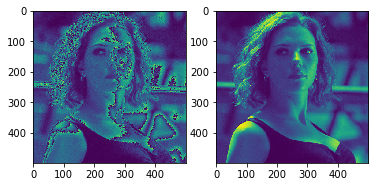

In [147]:
f = plt.figure()
f.add_subplot(1,2, 1)
gray_image1 = image.imread('grayscaled/average.jpg') 
plt.imshow(gray_image1)
f.add_subplot(1,2, 2)
gray_image2 = image.imread('grayscaled/luminosity.jpg')
plt.imshow(gray_image2)
plt.show(block=True)

# Negative Image

I will take numpy array from luminosity method (because it is clearer)

In [175]:
#input is numpy array with widht x height dimension
def generate_negative_numpy(arr,width,height):
    negative_array = []
    for row in range(0,height):
        row_column = []
        for column in range(0,width):
            row_column.append(255 - arr[row][column])
        negative_array.append(row_column)
    
    return np.array(negative_array)
            

In [177]:
negative_numpy_1 = generate_negative_numpy(gray_numpy_1,500,500)

In [179]:
new_im2 = Image.fromarray(negative_numpy_1.astype(np.uint8),mode='L')
new_im2.save("negative/negative.jpg")
new_im2.show()

# Binary Image (Thresholding)

I will take numpy array from luminosity method (because it is clearer)<br>
I will make median as a threshold

In [181]:
median_threshold = np.median(gray_numpy_1)

In [183]:
def generate_binary_numpy(arr,width,height):
    binary_array = []
    for row in range(0,height):
        row_column = []
        for column in range(0,width):
            if arr[row][column] < median_threshold:
                row_column.append(0)
            else:
                row_column.append(255)
        binary_array.append(row_column)
    
    return np.array(binary_array)

In [184]:
binary_numpy_1 = generate_binary_numpy(gray_numpy_1,500,500)

In [186]:
new_im3 = Image.fromarray(binary_numpy_1.astype(np.uint8),mode='L')
new_im3.save("binary/binary.jpg")
new_im3.show()

# Transformation

### Logaritmic transformation

In [187]:
#c is added to parameter --> c is a free constant
def generate_logaritmic_numpy(arr,width,height,c):
    log_array = []
    for row in range(0,height):
        row_column = []
        for column in range(0,width):
            row_column.append(c*np.log(255+arr[row][column]))
        log_array.append(row_column)
    
    return np.array(log_array)

In [202]:
log_numpy_1 = generate_logaritmic_numpy(gray_numpy_1,500,500,100)

In [203]:
new_im4 = Image.fromarray(binary_numpy_1.astype(np.uint8),mode='L')
new_im4.save("transformation/log_100.jpg")
new_im4.show()

### power Law Transformation

In [207]:
def generate_powerlaw_numpy(arr,width,height,c,gamma):
    law_array = []
    for row in range(0,height):
        row_column = []
        for column in range(0,width):
            row_column.append(c*(arr[row][column]**gamma))
        law_array.append(row_column)
    
    return np.array(law_array)

In [220]:
law_numpy_1 = generate_powerlaw_numpy(gray_numpy_1,500,500,1,5)

In [221]:
new_im5 = Image.fromarray(law_numpy_1.astype(np.uint8),mode='L')
new_im5.save("transformation/law_1_5.jpg")
new_im5.show()

### Bit plane slicing

In [252]:
def make_int(arr):
    test = []
    for i in range(0,500):
        row = []
        for j in range(0,500):
            row.append(int(arr[i][j]))
        test.append(row)
    
    return np.array(test)

In [289]:
def validify_binary(binar):
    
    if(len(binar)<8):
        temp =''
        for i in range(len(binar),8):
                temp +='0'
        temp += binar
    else:
        temp = binar
   
    return temp

def into_binary(number):
    return validify_binary("{0:b}".format(number))

In [364]:
def into_int(binar):
    temp = '0b'
    temp += binar
    return (int(temp,2))

In [367]:
def zero_bit_maker(flag,binar):
    temp = '00000000'
    inserted_bit = binar[flag]
    retval = temp[:flag] + inserted_bit +temp[flag+1:]
    return retval

#flag --> {0: MSB , 7:LSB}
def generate_bitplane_numpy(arr,width,height,flag):
    bitplane_array = []
    for row in range(0,height):
        row_array = []
        for column in range(0,width):
            binary_number = into_binary(arr[row][column])
            preprocessed_binary = zero_bit_maker(flag,binary_number)
            channel = into_int(preprocessed_binary)
            row_array.append(channel)
           
        bitplane_array.append(row_array)
    return np.array(bitplane_array)
        

In [293]:
gray_numpy_int = make_int(gray_numpy_1)

In [380]:
bitplane_numpy_1 = generate_bitplane_numpy(gray_numpy_int,500,500,5)

In [381]:
new_im6 = Image.fromarray(bitplane_numpy_1.astype(np.uint8),mode='L')
new_im6.save("bitplane/bit_5.jpg")
new_im6.show()

In [17]:
3//2

1